In [1]:
from InterOptimus.itworker import InterfaceWorker
from pymatgen.core.structure import Structure
from mp_api.client import MPRester

In [2]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [3]:
with MPRester('fFtrdShVJH4jwWHiId8v4cyGzV2oYnoG') as mpr:
        docs = mpr.materials.summary.search(
        material_ids = ["mp-1153", "mp-362"],
        fields=["material_id", "structure", "nelements"])
        for doc in docs:
            material_id = doc.material_id
            structure = doc.structure
    
            # 使用 SpacegroupAnalyzer 获取常规结构
            analyzer = SpacegroupAnalyzer(structure)
            doc.structure = analyzer.get_conventional_standard_structure()
film_conv, substrate_conv = docs[0].structure, docs[1].structure
iw = InterfaceWorker(film_conv, substrate_conv)

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
iw.lattice_matching(max_area = 16.5, max_length_tol = 0.03, max_angle_tol = 0.01,
                    film_max_miller = 1, substrate_max_miller = 1, film_millers = None, substrate_millers = None)
#Note max millers are in primitive cell, should be different from the indices in the polar projection below which are in conventional cell
#If you specify miller indices yourself, just ignore film_max_miller and substrate_max_miller

2


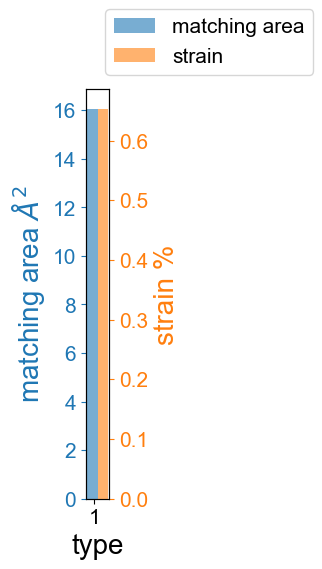

In [28]:
#Visualize matching information
iw.ems.plot_unique_matches() 

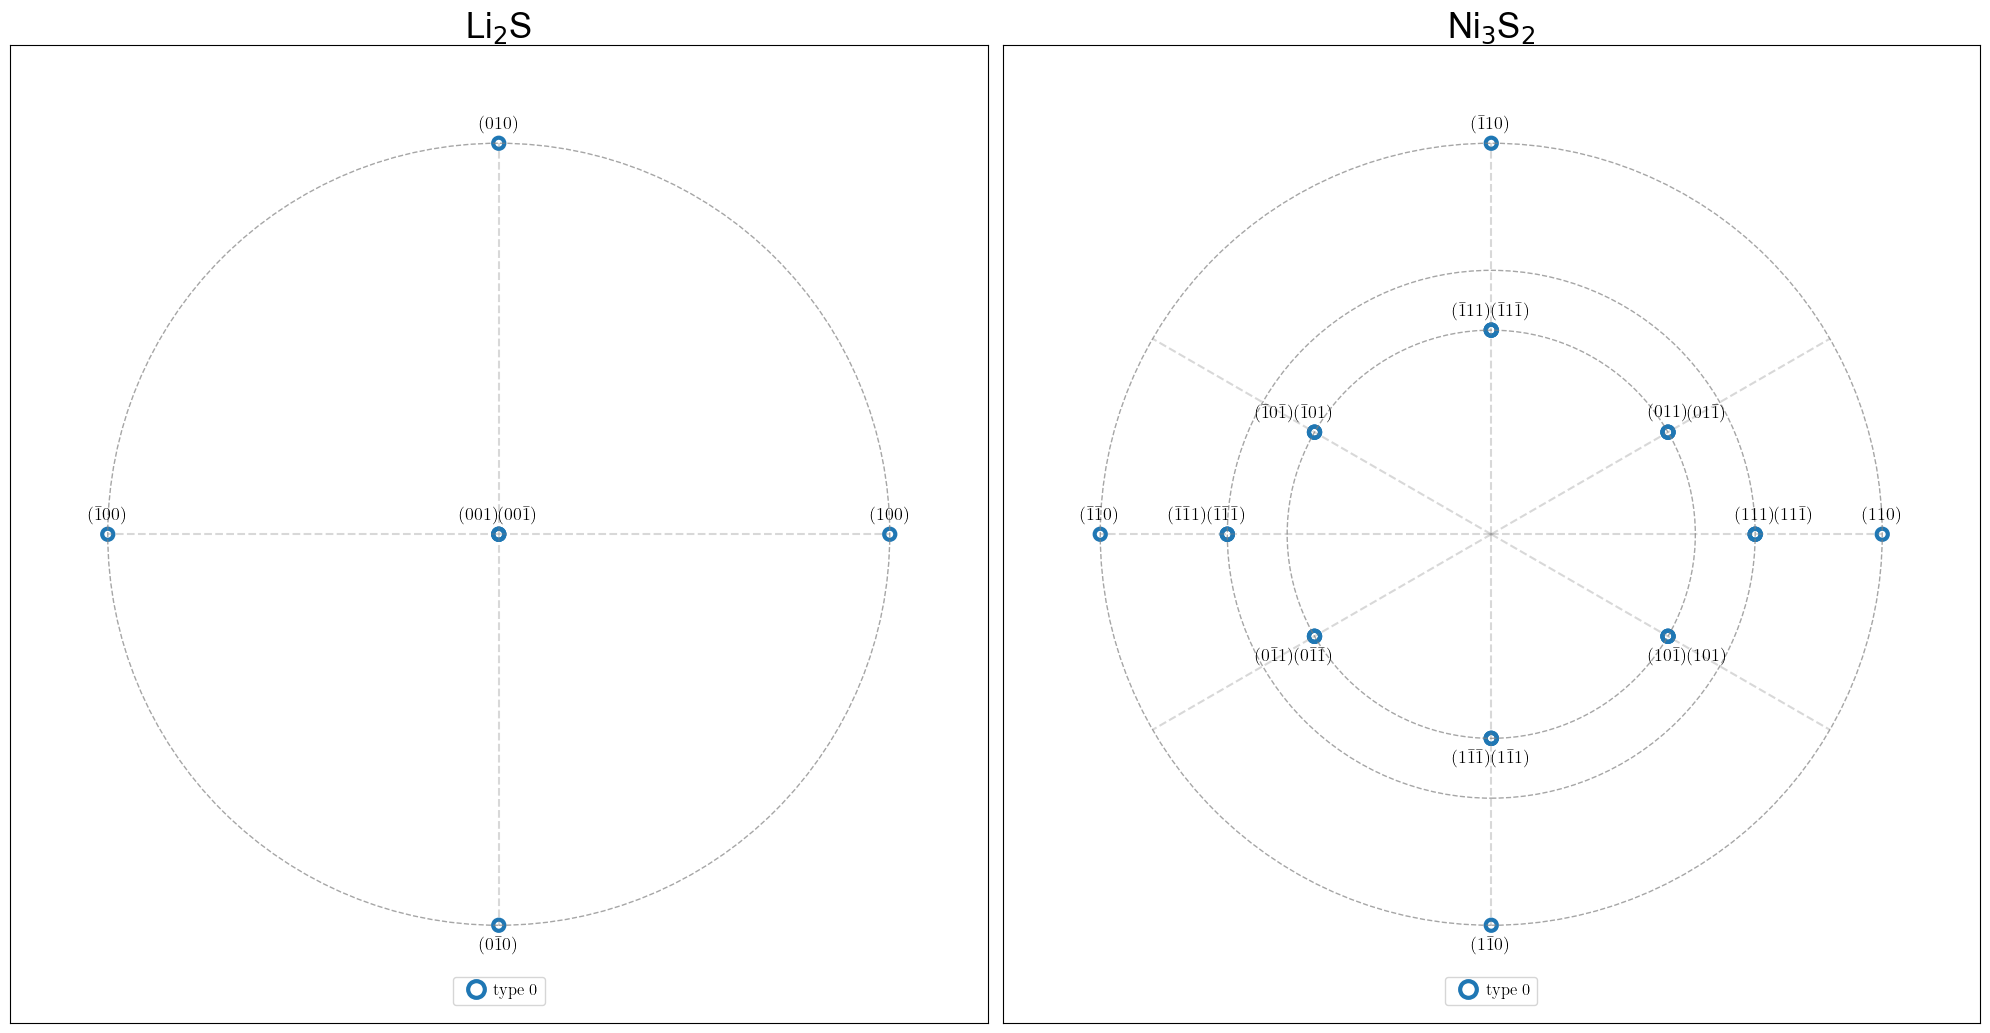

In [29]:
iw.ems.plot_matching_data(['Li$_2$S', 'Ni$_3$S$_2$'],'Ni3S2_Li2S_more.jpg', show_millers = True, show_legend = True)

In [33]:
iw.parse_interface_structure_params(termination_ftol = 0.01, c_periodic = False, \
                                    vacuum_over_film = 12, film_thickness = 10, \
                                    substrate_thickness = 10, shift_to_bottom = True)

symmetry checking progress: 100%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

In [46]:
wf = iw.mlip_benchmark(['mace'], 20, project_name = 'Ni3S2_LiS2', 
                                db_file = '/public5/home/t6s001944/.conda/envs/general/lib/python3.12/site-packages/atomate/config/db.json',
                                vasp_cmd = 'mpirun -np 96 vasp_std',
                                user_incar_settings={'NCORE':12}, 
                               work_dir = '/public5/home/t6s001944/InterOptimusPaper/minimization/Ni3S2_LiS2/vasp')

default settings
{'model': 'medium', 'device': 'cpu'}
crpi-aqvrppj8ebnguc34.cn-shenzhen.personal.cr.aliyuncs.com/jinlhr542/mace:0.0.1 container initializing...
Flask service is ready.
Performing initialization calculation ...
initialization completed


matches:   0%|          | 0/1 [00:00<?, ?it/s]

unique terminations:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

/opt/anaconda3/envs/3.12/lib/python3.12/site-packages/pymatgen/io/vasp/sets.py:276: BadInputSetWarning: Overriding the POTCAR functional is generally not recommended  as it significantly affects the results of calculations and compatibility with other calculations done with the same input set. Note that some POTCAR symbols specified in the configuration file may not be available in the selected functional.
  warnings.warn(


In [47]:
iw.global_optimized_data

,$h_s$,$k_s$,$l_s$,$h_f$,$k_f$,$l_f$,$A$ (Å$^2$),$\epsilon$,$E_{it}$ $(J/m^2)$,$E_{bd}$ $(J/m^2)$,...,$w_{f2}$,$u_{s1}$,$v_{s1}$,$w_{s1}$,$u_{s2}$,$v_{s2}$,$w_{s2}$,$T$,$i_m$,$i_t$
1,1,1,0,1,0,0,16.076353,0.00654,14.054624,-3.011437,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(1_S_P4/mmm_1, 2_Ni_P4/mmm_1)",0,1
5,1,1,0,1,0,0,16.076353,0.00654,14.691881,-1.272861,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(2_Li_P4/mmm_2, 1_Ni_P4/mmm_1)",0,5
0,1,1,0,1,0,0,16.076353,0.00654,14.729636,-1.235106,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(1_S_P4/mmm_1, 1_Ni_P4/mmm_1)",0,0
3,1,1,0,1,0,0,16.076353,0.00654,14.809255,-1.884518,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(1_S_P4/mmm_1, 4_Ni_P4/mmm_1)",0,3
9,1,1,0,1,0,0,16.076353,0.00654,15.061744,-2.004317,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(2_Li_P4/mmm_2, 5_S_P4/mmm_1)",0,9
7,1,1,0,1,0,0,16.076353,0.00654,15.091905,-1.601868,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(2_Li_P4/mmm_2, 3_S_P4/mmm_1)",0,7
6,1,1,0,1,0,0,16.076353,0.00654,15.319638,-1.746423,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(2_Li_P4/mmm_2, 2_Ni_P4/mmm_1)",0,6
8,1,1,0,1,0,0,16.076353,0.00654,15.541443,-1.152329,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(2_Li_P4/mmm_2, 4_Ni_P4/mmm_1)",0,8
2,1,1,0,1,0,0,16.076353,0.00654,16.097269,-0.596504,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(1_S_P4/mmm_1, 3_S_P4/mmm_1)",0,2
4,1,1,0,1,0,0,16.076353,0.00654,16.169054,-0.897008,...,1/2,-1/3,1/3,1/3,2/3,1/3,1/3,"(1_S_P4/mmm_1, 5_S_P4/mmm_1)",0,4


In [43]:
iw.output_slabs(0,0)

In [16]:
iw.opt_results[(0,0)]['it_Es']

array([14.53470415, 14.53484101, 14.53928905, 14.54234566, 14.55252673,
       14.57312458, 14.84194593, 15.23208856, 15.35371397, 15.4195906 ,
       15.47822871, 15.52032162, 15.57776598, 15.61119092, 16.15382152,
       17.27686445, 30.49556052, 44.51359619, 58.11322706, 86.79072873])

In [45]:
iw.benchmk_dict['mace'][(0,0)]['best_it']['structure'].to_file('POSCAR')

'Li8 Ni9 S10\n1.0\n   4.0309644414728574    0.0000000000000000    0.0000000000000002\n   0.0378410155796778    4.0307868197113192   -0.0000000000000006\n   0.0000000000000000    0.0000000000000000   34.0382342909544420\nLi Ni S\n8 9 10\ndirect\n   0.9764211519050415    0.7691210999290884    0.6564156950867205 Li\n   0.4764211519050414    0.2691210999290885    0.6564156950867205 Li\n   0.4764211519050416    0.2691210999290883    0.5731220724322023 Li\n   0.9764211519050415    0.7691210999290885    0.5731220724322023 Li\n   0.9764211519050420    0.7691210999290887    0.4898284497776842 Li\n   0.4764211519050416    0.2691210999290883    0.4898284497776842 Li\n   0.4764211519050412    0.2691210999290883    0.4065348271231662 Li\n   0.9764211519050411    0.7691210999290883    0.4065348271231662 Li\n   0.7640905664519217    0.2545099864519216    0.0301708049100639 Ni\n   0.2568796065861870    0.5116698965861868    0.0603416098201278 Ni\n   0.5069306563176564    0.7617209463176563    0.000000